In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [11]:
def design_matrix(X, degree=2):
    """
    Returns a design matrix.
    
    Args:
        X: Array of shape (m,1) with 'm' independent data.
        degree: Integer with the degree of the polynomial. 
                  Note that a degree-n polynomial has n+1 coefficients.
                  
    Returns:
        X_d: Design matrix of shape (m,  order+1).
    """
    
    X_d = np.ones((len(X),1))                  # Create array of 1's
    for i in range(1, degree+1):               # Iterate through number of polynomial orders
        X_d = np.append(X_d, X**i, axis=1)     # Add columns of X^i to array
    return X_d

In [34]:
m = 200 # Number of data

# X are picked uniform random [0,2]
X = 2 * np.random.rand(m, 1)
# Linear relation to the predicted value, but with Gaussian noise (mean=0, variance=1)
y = (-0.3 * X**3 ) + (0.5 * X**2 ) + ( X ) + 0.4 + ( 0.1 * np.random.randn(m, 1))

In [35]:
def solve_normal_equation(X_d, y):
    """
    Solve the normal equation.
    
    Args:
        X_d: Design matrix of shape (m,n) with 'm' independent data
               and 'n' features.
        y: Dependent data of shape (m,1).
                  
    Returns:
        theta_best: Best parameters, array of shape (n,).
    """
    theta_best = ((np.linalg.inv(X_d.T.dot(X_d))).dot(X_d.T)).dot(y)
    return theta_best.flatten()

In [36]:
X_d = design_matrix(X, 3)                                 # Generate design matrix, degree = 2
theta = solve_normal_equation(X_d, y)                     # Solve normal equation
true_coef = [0.4, 1, 0.5, -0.3]
print("Coefficients from normal equation: {}".format(theta))
print("Coefficients from true data generator: {}".format(true_coef))

Coefficients from normal equation: [ 0.39157226  1.00154944  0.48321736 -0.2886678 ]
Coefficients from true data generator: [0.4, 1, 0.5, -0.3]


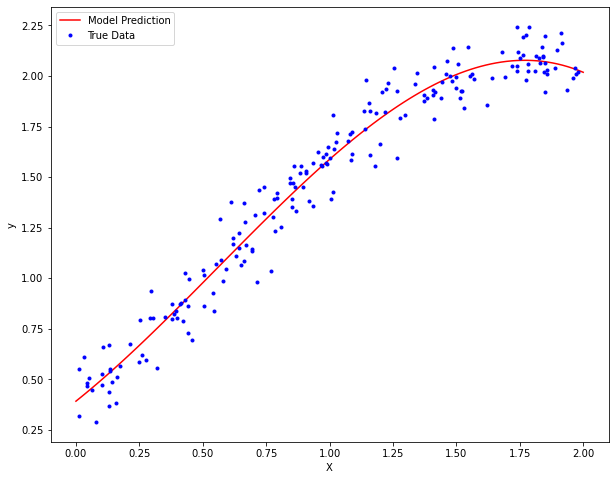

In [37]:
X_new = np.linspace(0, 2, 100).reshape(100, 1)            # Generate 100 X values between 0 and 2
poly_transform = PolynomialFeatures(degree=3)
X_poly = poly_transform.fit_transform(X_new)              # Generate polynomial matrix from X values
y_new = X_poly.dot(theta)                                 # Predict y values using theta


fig, ax = plt.subplots(figsize=(10,8))
ax.plot(X_new, y_new, color='red', label="Model Prediction")      # Plot predicted values
ax.plot(X, y, "b.",label="True Data")                             # Plot true values
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.legend(loc='best');

In [38]:
def A_matrix(X_d, variance):
    for i in range(X_d.shape[0]):
        X_d[i] = X_d[i] / np.sqrt(variance[i])
    return X_d

In [ ]:
A1 = A_matrix(X1, var_obs)
b1 = z_1 / np.sqrt(var_obs)

A2 = A_matrix(X2, var_obs)
b2 = z_2 / np.sqrt(var_obs)